In [1]:
from utils.dataset import HERDataset
from model_src.model_setup import model_setup
from utils.tensorboard import TBoardGraphs
import hashids
import time
from model_src.network import Network
import torch
from utils.simulation import HERSimulation
from prettytable import PrettyTable
import copy

torch.manual_seed(0)

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

hid = hashids.Hashids()
logname = hid.encode(int(time.time() * 1000000))
data_path = '/home/hendrik/Documents/master_project/LokalData/'
tboard = TBoardGraphs(logname=logname, data_path=data_path)

train_data = HERDataset(path='/home/hendrik/Documents/master_project/Code/MasterProject/data_fetch_random_100.npz', device='cuda', num_ele=-0)
val_data = copy.deepcopy(train_data)

model_setup['seq_len'] = 53
model_setup['decoder']['d_output'] = 11
#model_setup['transformer']['d_output']=4
model_setup['transformer']['d_inpt'] = 400
new_model_setup = model_setup
datasets = {'train':train_data, 'val':val_data}
model_lr = 6e-5
critic_lr = 6e-5
batch_size = 32

simulation = HERSimulation()



network = Network(model_setup=model_setup, data_sets=datasets, model_lr=model_lr, critic_lr=critic_lr, batchsize=16, tboard=tboard, simulation=simulation, batch_size=batch_size, save_path=data_path, logname = logname)
count_parameters(network)
network.save()
network.load()


2022-06-18 22:41:21.787114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/hendrik/Documents/master_project/CoppeliaSim_Player_V4_1_0_Ubuntu20_04:/home/hendrik/.mujoco/mujoco200/bin
2022-06-18 22:41:21.787133: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


obsv:torch.Size([16, 10])
+---------------------------------------------------------------------------------+------------+
|                                     Modules                                     | Parameters |
+---------------------------------------------------------------------------------+------------+
|     model.transformer.transformer_encoder.layers.0.self_attn.in_proj_weight     |   480000   |
|      model.transformer.transformer_encoder.layers.0.self_attn.in_proj_bias      |    1200    |
|     model.transformer.transformer_encoder.layers.0.self_attn.out_proj.weight    |   160000   |
|      model.transformer.transformer_encoder.layers.0.self_attn.out_proj.bias     |    400     |
|          model.transformer.transformer_encoder.layers.0.linear1.weight          |   160000   |
|           model.transformer.transformer_encoder.layers.0.linear1.bias           |    400     |
|          model.transformer.transformer_encoder.layers.0.linear2.weight          |   160000   |
|   

len succ: 100
len fail: 0


/home/hendrik/anaconda3/envs/mujoco/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


added data
data len: 150
len succ: 102
len fail: 48


/home/hendrik/anaconda3/envs/mujoco/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


added data
data len: 200
len succ: 142
len fail: 58
epoch: 0


RuntimeError: CUDA error: CUBLAS_STATUS_INTERNAL_ERROR when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

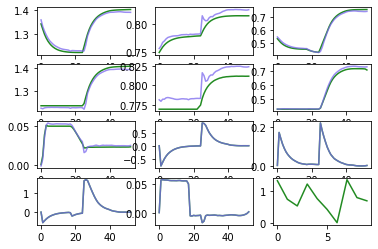

In [2]:
network.train(epochs=100000)

In [ ]:
import gym

In [ ]:
env = gym.make('FetchPickAndPlace-v1')

/home/hendrik/anaconda3/envs/baselines/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
result = env.reset()

In [1]:
import torch

In [2]:
a = torch.tensor([False, False, True])
b = torch.tensor([1,2,3]).reshape(-1,1)
b = torch.cat((b, b[a]), dim=0)

In [3]:
b

tensor([[1],
        [2],
        [3],
        [3]])

In [12]:
label

tensor([[1, 2]])